# Trabajo Práctico 6 - Procesamiento de Imágenes

- Francisco Devaux
- Agustín Yornet de Rosas

## 1 Representación y Descripción de Características

### Ejercicio 2

> Representación por relleno de regiones. Identificar los objetos en una imagen binaria y colorear cada región detectada. Sugerencia: scikit-image: measure.label, regionprops, label2rgb.

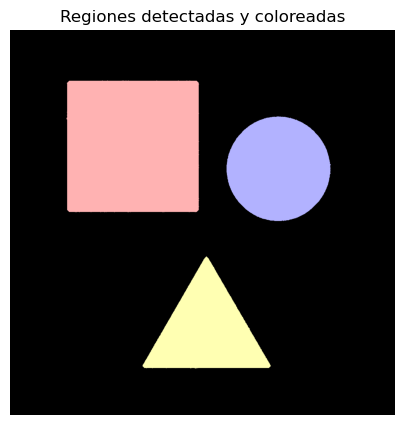

In [1]:
from skimage import io, measure, color
import matplotlib.pyplot as plt

# Cargar la imagen binaria
image = io.imread('imagenes/bin1.png', as_gray=True)

# Etiquetar las regiones conectadas
labels = measure.label(image)

# Colorear cada región detectada
image_label_overlay = color.label2rgb(labels, image=image, bg_label=0)

# Mostrar la imagen coloreada
plt.figure(figsize=(5, 5))
plt.imshow(image_label_overlay)
plt.axis('off')
plt.title('Regiones detectadas y coloreadas')
plt.show()

### Ejercicio 4

> Cálculo de propiedades geométricas. Extraer área, perímetro, excentricidad y compacidad de cada región segmentada. Sugerencia: regionprops de skimage.measure.

In [2]:
import pandas as pd

# Extraer propiedades geométricas de cada región segmentada
props = measure.regionprops(labels)

# Crear listas para almacenar las propiedades
areas = []
perimetros = []
excentricidades = []
compacidades = []

for region in props:
    area = region.area
    perimetro = region.perimeter
    excentricidad = region.eccentricity
    # Compacidad: (perímetro^2) / (4 * pi * área)
    compacidad = (perimetro ** 2) / (4 * 3.1416 * area) if area > 0 else 0

    areas.append(area)
    perimetros.append(perimetro)
    excentricidades.append(excentricidad)
    compacidades.append(compacidad)

# Mostrar resultados en una tabla

df_props = pd.DataFrame({
    'Área': areas,
    'Perímetro': perimetros,
    'Excentricidad': excentricidades,
    'Compacidad': compacidades
})

df_props

,Área,Perímetro,Excentricidad,Compacidad
0,122135.0,1416.249783,0.074994,1.306859
1,59913.0,931.744299,0.125498,1.153086
2,52395.0,1075.844805,0.070160,1.757918


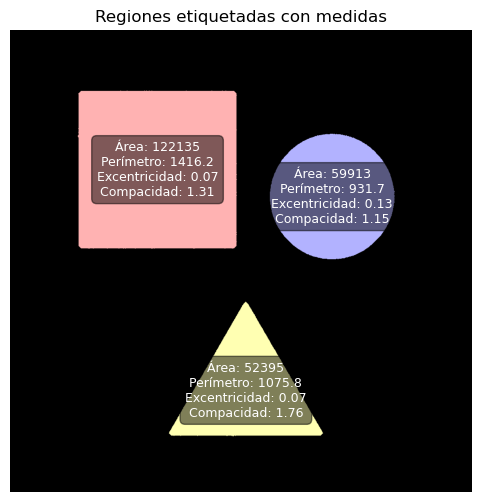

In [3]:
# Mostrar cada región etiquetada con sus medidas en píxeles
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(image_label_overlay)
ax.set_axis_off()
ax.set_title('Regiones etiquetadas con medidas')

for i, region in enumerate(props):
    # Coordenadas del centroide de la región
    y, x = region.centroid
    # Texto con las medidas
    texto = (f'Área: {region.area:.0f}\n'
             f'Perímetro: {region.perimeter:.1f}\n'
             f'Excentricidad: {region.eccentricity:.2f}\n'
             f'Compacidad: {(region.perimeter**2/(4*3.1416*region.area)):.2f}')
    # Mostrar el texto en la imagen
    ax.text(x, y, texto, color='white', fontsize=9, ha='center', va='center',
            bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.4'))

plt.show()

### Ejercicio 6
> Descriptores de textura con GLCM. Calcular contraste, correlación y homogeneidad de regiones usando matrices de co-ocurrencia. skimage.feature.greycomatrix, greycoprops.

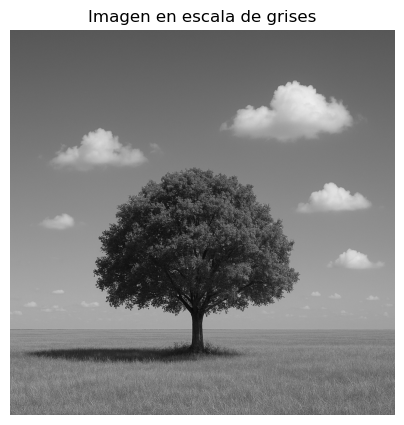

Contraste: 279.4402
Correlación: 0.9167
Homogeneidad: 0.3069


In [4]:
from skimage.feature import graycomatrix, graycoprops
from skimage.util import img_as_ubyte

# Cargar imagen y convertirla a escala de grises (uint8)
image_rgb = io.imread('imagenes/tree.png')   # Usa una ruta válida
image_gray = color.rgb2gray(image_rgb)          # Devuelve flotantes [0.0, 1.0]
image_gray = img_as_ubyte(image_gray)           # Convierte a uint8 [0, 255]

# Calcular la matriz GLCM
glcm = graycomatrix(image_gray,
                    distances=[1],              # distancia entre píxeles
                    angles=[0],                 # ángulo 0° (horizontal)
                    levels=256,                 # niveles de gris
                    symmetric=True,
                    normed=True)

# Calcular descriptores de textura
contrast = graycoprops(glcm, 'contrast')[0, 0]
correlation = graycoprops(glcm, 'correlation')[0, 0]
homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]

# Mostrar la imagen original en escala de grises
plt.figure(figsize=(5, 5))
plt.imshow(image_gray, cmap='gray')
plt.axis('off')
plt.title('Imagen en escala de grises')
plt.show()

# Mostrar resultados
print(f'Contraste: {contrast:.4f}')
print(f'Correlación: {correlation:.4f}')
print(f'Homogeneidad: {homogeneity:.4f}')


Graycoprops nos permite calcular las propiedades de contraste, correlación y homogeneidad de una imagen. Para esto, elegimos `tree.png`.

El contraste mide la diferencia de intensidad entre píxeles vecinos, la correlación indica cómo varían las intensidades entre píxeles vecinos y la homogeneidad mide la uniformidad de la distribución de intensidades.

El contraste se mide como:

$$
\text{Contraste} = \sum_{i,j = 0} ^ {niveles - 1} P_{i,j} (i - j)^2 
$$

La correlación se mide como:

$$
\text{Correlación} = \sum_{i,j = 0} ^ {niveles - 1} P_{i,j}\left[\frac{(i - \mu_i)(j - \mu_j) }{\sqrt{(\sigma_i^2) (\sigma_j^2)}}\right]
$$

La homogeneidad se mide como:

$$  
\text{Homogeneidad} = \sum_{i,j = 0} ^ {niveles - 1} \frac{P_{i,j}}{1 + (i - j)^2}
$$

Un valor de contraste alto indica que hay una gran diferencia de intensidad entre píxeles vecinos, lo que puede sugerir bordes o texturas fuertes. Como el valor de contraste es 279.4402, podemos decir que este es el caso.

Un valor de correlación alto indica que las intensidades de los píxeles vecinos están altamente correlacionadas, lo que puede sugerir una textura uniforme. En este caso, el valor de correlación es 0.9167, lo que indica una alta correlación entre las intensidades de los píxeles vecinos.

Los valores de homogeneidad pueden ir de 0 a 1, donde un valor cercano a 1 indica que la imagen es homogénea. En este caso, el valor de homogeneidad es de 0.3069, lo que indica que la imagen no es muy homogénea.

### Ejercicio 8

> Relación espacial entre regiones. Determinar si las regiones están adyacentes o si una está contenida en otra. skimage.measure.regionprops + análisis de coordenadas / bounding boxes.

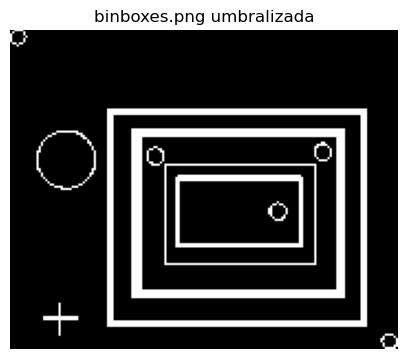

/tmp/ipykernel_18612/2874773933.py:14: UserWarning: imagenes/binboxes_binary.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('imagenes/binboxes_binary.png', binary_binboxes)


In [5]:
# Umbralizar la imagen binboxes.png y mostrar el resultado
img_gray = io.imread('imagenes/binboxes.png', as_gray=True)

# Si img_gray ya está definido, lo usamos directamente
binary_binboxes = img_gray > 100

plt.figure(figsize=(5, 5))
plt.imshow(binary_binboxes, cmap='gray')
plt.axis('off')
plt.title('binboxes.png umbralizada')
plt.show()

# Guardar la imagen binaria
io.imsave('imagenes/binboxes_binary.png', binary_binboxes)


Región 2 contiene a la región 3
Región 2 contiene a la región 5
Región 2 contiene a la región 6
Región 2 contiene a la región 7
Región 2 contiene a la región 8
Región 2 contiene a la región 9
Región 3 contiene a la región 5
Región 3 contiene a la región 6
Región 3 contiene a la región 7
Región 3 contiene a la región 8
Región 3 contiene a la región 9
Región 6 es adyacente a la región 7
Región 7 contiene a la región 8
Región 7 contiene a la región 9
Región 8 contiene a la región 9


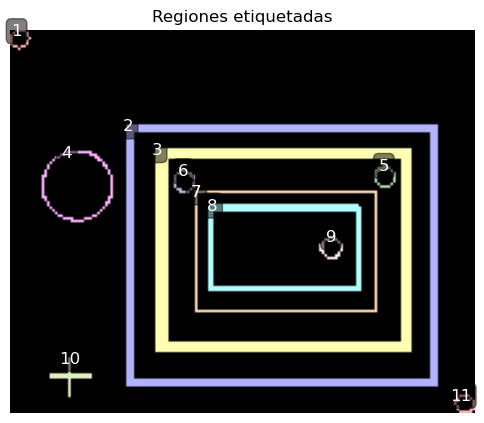

In [6]:
from skimage import measure
from skimage.color import label2rgb
import numpy as np

# Cargar la imagen binaria guardada
binboxes_binary = io.imread('imagenes/binboxes_binary.png', as_gray=True) > 0

# Etiquetar las regiones conectadas
labels_binboxes = measure.label(binboxes_binary)
props_binboxes = measure.regionprops(labels_binboxes)

# Analizar relaciones espaciales entre regiones
def check_adjacency_or_containment(props):
    n = len(props)
    results = []
    for i in range(n):
        for j in range(i + 1, n):
            # Bounding boxes: (min_row, min_col, max_row, max_col)
            minr1, minc1, maxr1, maxc1 = props[i].bbox
            minr2, minc2, maxr2, maxc2 = props[j].bbox

            # Chequear contención
            contained_ij = (minr1 <= minr2 and minc1 <= minc2 and maxr1 >= maxr2 and maxc1 >= maxc2)
            contained_ji = (minr2 <= minr1 and minc2 <= minc1 and maxr2 >= maxr1 and maxc2 >= maxc1)

            # Chequear adyacencia (si los bounding boxes se tocan o se superponen)
            overlap_r = not (maxr1 < minr2 or maxr2 < minr1)
            overlap_c = not (maxc1 < minc2 or maxc2 < minc1)
            adjacent = (overlap_r and (maxc1 == minc2 or maxc2 == minc1)) or (overlap_c and (maxr1 == minr2 or maxr2 == minr1))

            if contained_ij:
                results.append(f'Región {i+1} contiene a la región {j+1}')
            elif contained_ji:
                results.append(f'Región {j+1} contiene a la región {i+1}')
            elif adjacent:
                results.append(f'Región {i+1} es adyacente a la región {j+1}')

    return results

relaciones = check_adjacency_or_containment(props_binboxes)

for r in relaciones:
    print(r)
    
# Mostrar la imagen con las regiones coloreadas y el número de cada región en su centroide
image_label_overlay_binboxes = label2rgb(labels_binboxes, image=binboxes_binary, bg_label=0)

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(image_label_overlay_binboxes)
ax.set_axis_off()
ax.set_title('Regiones etiquetadas')

for i, region in enumerate(props_binboxes):
    
    # Obtener coordenadas de píxeles de la región
    coords = region.coords
    # Buscar el píxel con la fila más pequeña (borde superior)
    topmost = coords[np.argmin(coords[:, 0])]
    y, x = topmost  # coordenadas del borde superior
        
    ax.text(x, y, str(i + 1), color='white', fontsize=12, ha='center', va='center',
            bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.3'))

plt.show()

## 2 Reconocimiento de Patrones

### Ejercicio 1
> Template Matching. Buscar una figura conocida dentro de una imagen mediante una plantilla. Sugerencia: cv2.matchTemplate, cv2.minMaxLoc.

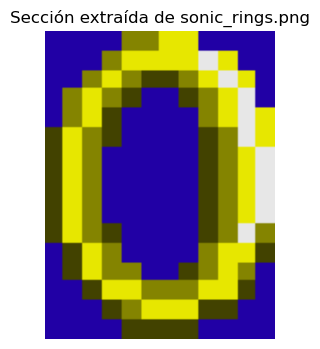

In [7]:
from skimage import io

sonic_img = io.imread('imagenes/sonic_rings.png')

start_row, end_row = 90, 215
start_col, end_col = 632, 725
sonic_section = sonic_img[start_row:end_row, start_col:end_col]

plt.figure(figsize=(4, 4))
plt.imshow(sonic_section)
plt.axis('off')
plt.title('Sección extraída de sonic_rings.png')
plt.show()

io.imsave('imagenes/sonic_section.png', sonic_section)

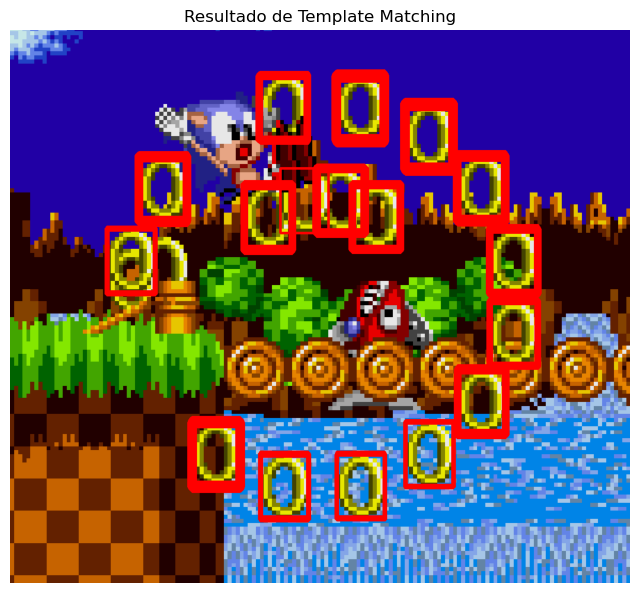

Valor de coincidencia máxima: 1.0000
Ubicación superior izquierda: (632, 90)


In [8]:
import cv2

sonic_img_gray = cv2.cvtColor(sonic_img, cv2.COLOR_RGB2GRAY)
sonic_section_gray = cv2.cvtColor(sonic_section, cv2.COLOR_RGB2GRAY)

result = cv2.matchTemplate(sonic_img_gray, sonic_section_gray, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

threshold = 0.55  # Umbral para considerar una coincidencia
h, w = sonic_section_gray.shape

locs = np.where(result >= threshold)
sonic_img_matched = sonic_img.copy()

for pt in zip(*locs[::-1]):  # (x, y) posiciones
    top_left = pt
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(sonic_img_matched, top_left, bottom_right, (255, 0, 0), 3)

top_left = max_loc

plt.figure(figsize=(8, 8))
plt.imshow(sonic_img_matched)
plt.axis('off')
plt.title('Resultado de Template Matching')
plt.show()

print(f'Valor de coincidencia máxima: {max_val:.4f}')
print(f'Ubicación superior izquierda: {top_left}')

### Ejercicio 2 

> Clasificación basada en características. Extraer características simples (como área o textura) de regiones segmentadas y clasificarlas usando KNN. Sugerencia: scikit-learn + descriptores de regionprops.

Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



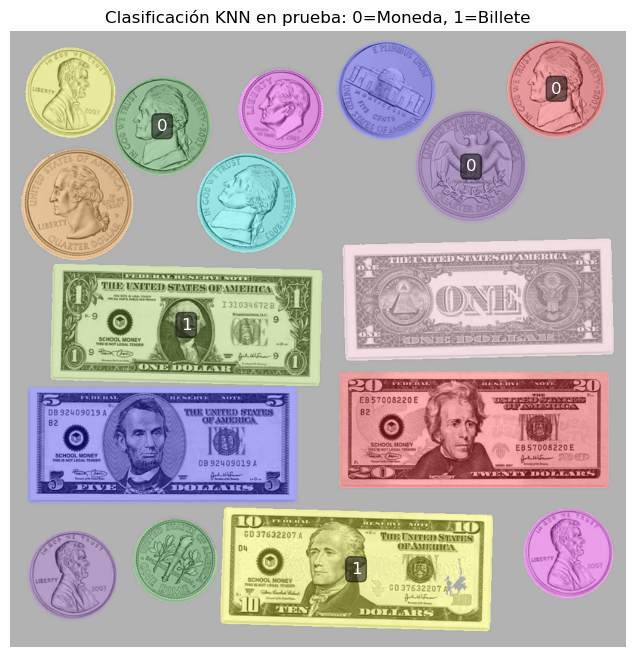

In [9]:
from skimage import io, color, measure, filters, morphology
from skimage.feature import graycomatrix, graycoprops
from skimage.util import img_as_ubyte
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cargar imagen y convertir a escala de grises
img_bills = io.imread('imagenes/bills-coins.jpg')
img_gray = color.rgb2gray(img_bills)
img_gray_u8 = img_as_ubyte(img_gray)

# Umbralizar para segmentar regiones (binarización automática)
thresh = 240
binary_bills = img_gray_u8 < thresh

# Limpiar pequeñas regiones y agujeros
binary_bills = morphology.remove_small_objects(binary_bills, 500)
binary_bills = morphology.remove_small_holes(binary_bills, 500)

# Etiquetar regiones conectadas
labels_bills = measure.label(binary_bills)
props_bills = measure.regionprops(labels_bills, intensity_image=img_gray_u8)

# Extraer características: área, perímetro y contraste GLCM
areas = []
contrastes = []
perimetros = []

for region in props_bills:
    areas.append(region.area)
    minr, minc, maxr, maxc = region.bbox
    region_img = img_gray_u8[minr:maxr, minc:maxc]
    glcm = graycomatrix(region_img, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contraste = graycoprops(glcm, 'contrast')[0, 0]
    contrastes.append(contraste)
    perimetros.append(region.perimeter)

# Crear DataFrame de características
X = np.column_stack([areas, perimetros, contrastes])
df_features = pd.DataFrame(X, columns=['Área', 'Perímetro', 'Contraste'])

# Etiquetas automáticas solo para ejemplo (esto debe hacerse manualmente en práctica)
labels = (df_features['Área'] > 70000).astype(int)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test, regions_train, regions_test = train_test_split(
    X, labels, props_bills, test_size=0.3, random_state=2
)

# Entrenar KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predecir
preds = knn.predict(X_test)

print("Reporte de clasificación:\n", classification_report(y_test, preds))

# Visualizar clasificación (solo para conjunto de prueba)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(color.label2rgb(labels_bills, image=img_bills, bg_label=0))
for region, clase in zip(regions_test, preds):
    y, x = region.centroid
    ax.text(x, y, str(clase), color='white', fontsize=12, ha='center', va='center',
            bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.3'))
ax.set_axis_off()
ax.set_title('Clasificación KNN en prueba: 0=Moneda, 1=Billete')
plt.show()


### Ejercicio 5
> Reconocimiento estructural. Representar caracteres como grafos de líneas y nodos. Clasificarlos según su estructura. Sugerencia: Estructuras de grafos con networkx (librería de python).

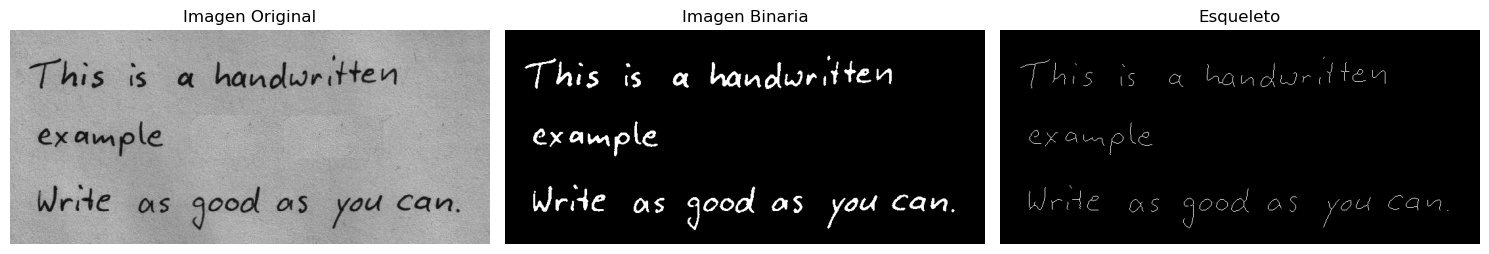

In [12]:
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.morphology import skeletonize
from skimage.filters import threshold_otsu
from skimage.morphology import opening, closing, disk

# Cargar imagen
image_path = "imagenes/handwritten-text.png"
image = imread(image_path)

if image.shape[-1] == 4:
    image = image[..., :3]

# Convertir a escala de grises
gray_image = rgb2gray(image)

# Binarización utilizando umbral de Otsu
thresh = threshold_otsu(gray_image)
binary_image = gray_image < thresh  # Invertimos porque el texto es oscuro sobre fondo claro

# Aplicar apertura y cierre morfológico para eliminar ruido de sal y pimienta
binary_image = opening(binary_image, disk(1))
binary_image = closing(binary_image, disk(1))

# Esqueletización
skeleton = skeletonize(binary_image)

# Mostrar resultados
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image)
axes[0].set_title("Imagen Original")
axes[0].axis('off')

axes[1].imshow(binary_image, cmap='gray')
axes[1].set_title("Imagen Binaria")
axes[1].axis('off')

axes[2].imshow(skeleton, cmap='gray')
axes[2].set_title("Esqueleto")
axes[2].axis('off')

plt.tight_layout()
plt.show()


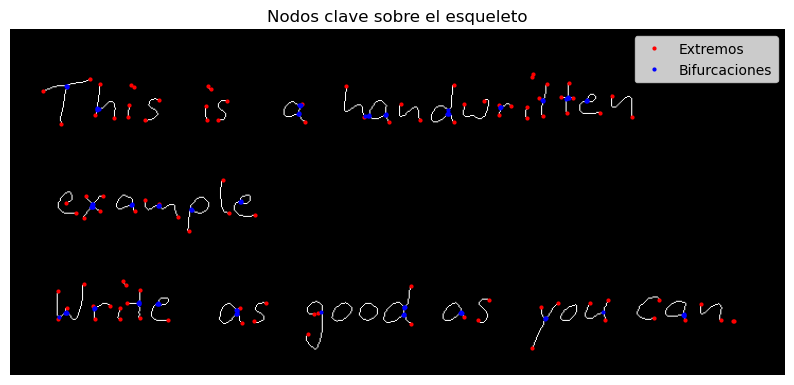

In [13]:
import networkx as nx
from skimage.util import img_as_ubyte

# Convertir el esqueleto a imagen binaria tipo uint8
skeleton_uint8 = img_as_ubyte(skeleton)

# Crear grafo vacío
G = nx.Graph()

# Tamaño de la imagen
rows, cols = skeleton.shape

# Función para obtener vecinos 8-conectados
def get_neighbors(r, c):
    neighbors = []
    for dr in [-1, 0, 1]:
        for dc in [-1, 0, 1]:
            if dr == 0 and dc == 0:
                continue
            nr, nc = r + dr, c + dc
            if 0 <= nr < rows and 0 <= nc < cols:
                if skeleton[nr, nc]:
                    neighbors.append((nr, nc))
    return neighbors

# Paso 1: Añadir nodos y aristas
for r in range(rows):
    for c in range(cols):
        if skeleton[r, c]:  # Si el píxel pertenece al esqueleto
            neighbors = get_neighbors(r, c)
            G.add_node((r, c))
            for nbr in neighbors:
                G.add_edge((r, c), nbr)

# Paso 2: Identificar nodos clave (extremos y bifurcaciones)
endpoints = [n for n in G.nodes if G.degree[n] == 1]
junctions = [n for n in G.nodes if G.degree[n] > 2]

# Mostrar grafo sobre imagen
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(skeleton, cmap='gray')
ep_y, ep_x = zip(*endpoints)
jx_y, jx_x = zip(*junctions)
ax.plot(ep_x, ep_y, 'ro', markersize=2, label='Extremos')
ax.plot(jx_x, jx_y, 'bo', markersize=2, label='Bifurcaciones')
ax.set_title("Nodos clave sobre el esqueleto")
ax.axis('off')
ax.legend()
plt.show()

In [17]:
import pandas as pd

# Clasificación estructural de caracteres según extremos y bifurcaciones

def clasificacion_estructural(G):
    extremos = [n for n in G.nodes if G.degree[n] == 1]
    bifurcaciones = [n for n in G.nodes if G.degree[n] > 2]
    if len(extremos) == 2 and len(bifurcaciones) == 0:
        return "Línea simple"
    elif len(extremos) == 0 and len(bifurcaciones) == 0:
        return "Círculo cerrado"
    elif len(bifurcaciones) == 1 and len(extremos) == 3:
        return "Y (bifurcación simple)"
    elif len(bifurcaciones) > 1:
        return "Estructura ramificada"
    else:
        return "Otra"

# Obtener componentes conexos del grafo (cada carácter es un subgrafo)
subgraphs = [G.subgraph(c).copy() for c in nx.connected_components(G)]

# Clasificar cada subgrafo estructuralmente
clases = [clasificacion_estructural(g) for g in subgraphs]

# Guardar resultados en un DataFrame
df_graph_features = pd.DataFrame({
    'Componente': range(len(subgraphs)),
    'Clase estructural': clases
})

# Guardar la lista de grafos para usar en la celda siguiente
graphs = subgraphs

df_graph_features

,Componente,Clase estructural
0,0,Línea simple
1,1,Estructura ramificada
2,2,Estructura ramificada
3,3,Estructura ramificada
4,4,Estructura ramificada
5,5,Línea simple
6,6,Estructura ramificada
7,7,Línea simple
8,8,Estructura ramificada
9,9,Estructura ramificada


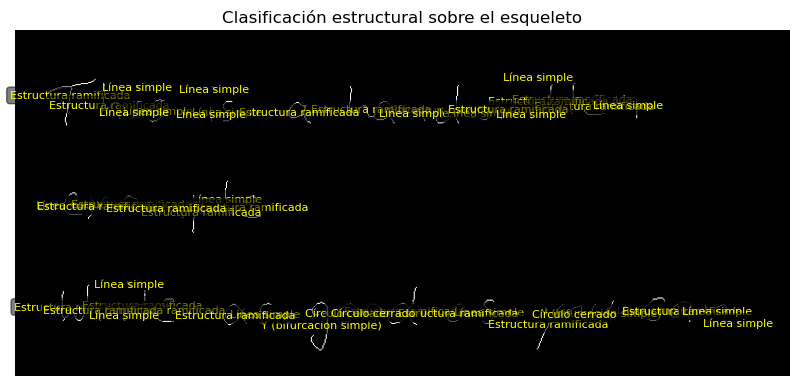

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(skeleton, cmap='gray')
for idx, row in df_graph_features.iterrows():
    # Para cada componente, buscar el primer nodo del grafo correspondiente
    G = graphs[idx]
    if len(G.nodes) == 0:
        continue
    # Obtener el centroide aproximado de los nodos del grafo
    nodes = np.array(list(G.nodes))
    y_c, x_c = nodes.mean(axis=0)
    ax.text(x_c, y_c, row['Clase estructural'], color='yellow', fontsize=8, ha='center', va='center',
            bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.3'))
ax.set_title("Clasificación estructural sobre el esqueleto")
ax.axis('off')
plt.show()